# PROJETO 01 - Estudos Python


### Vinicius Guerra e Ribas


# ANÁLISE EXPLORATÓRIA UTILIZANDO DADOS DE MERCADO SAMP

#  DICIONÁRIO DE DADOS:

#### Os dados foram extraídos dos relatórios de consumo e receita de distribuição através do link: ( https://www.aneel.gov.br/relatorios-de-consumo-e-receita ). <Acesso em 9 de setembro de 2021.>


Ano: ano de coleta dos dados, variando entre 2003 a 2021.

Mes: mes da coleta dos dados, variando entre 01 e 12.

DessClasseConsumo: tipologia da classe de consumo, variando entre: Comecial, Industrial, Rural, etc..
    
NomeAgente: Distribuidoras de energia elétrica do Brasil.
    
FaixaTensao: Nivel de tensão das unidades consumidoras.

ConsumoEnergiaEletricaMWh: Consumo aferido no período em questão.

ReceitaFornecimentoEE: Receita em Reais do consumo:
    (Consumo * Tarifa).

NumeroUnidadesConsumidoras: Unidades consumidoras da classe e nível de tensão;

ReceitaFornecimentoEEImp: Receita + Impostos em Reais do Consumo:
    (Consumo * TarifaImp).

TarifaMediaFornecimento: Multiplicador tributário para valorar o consumo; e

TarifaMediaFornecimentoImp: Multiplicador tributário para valorar o consumo, com impostos.

DataUltAtu: Data da ultima atualização dos dados utilizados.



## Importando bibliotecas:

In [40]:
# Básicas Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Expressões Regulares
import re

# Estatística
import statsmodels.api as sm
from scipy import stats
import dash
# Imputação de dados
# import missingpy

# Scikit Learn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# Pickle para Salvar Modelo
import pickle

In [16]:
conda install -c conda-forge dash


Note: you may need to restart the kernel to use updated packages.


'conda' nÃ£o Ã© reconhecido como um comando interno
ou externo, um programa operÃ¡vel ou um arquivo em lotes.


## Abrindo e carregando o arquivo:


In [17]:
# Abrindo e carregando o Dataset.

df = pd.read_excel('Dados/RelSAMPClasseConsNivel.xlsx', sheet_name='RelSAMPClasseConsNivel')


In [41]:
#Futuras alterações
# df = pd.read_csv('Dados/RelSAMPClasseConsNivel.csv')

### Existem colunas que não vão ser utilizadas. Por não terem dados relevantes ou por conterem dados NaN. A visualização permite verifica-los e remove-los

In [42]:
# visualizando o dataframe
df.head()

,Ano,Mes,DescClasseConsumo,NomeAgente,FaixaTensao,ConsumoEnergiaEletricaMWh,ReceitaFornecimentoEE,NumeroUnidadesConsumidoras,ReceitaFornecimentoEEImp,TarifaMediaFornecimento,TarifaMediaFornecimentoImp
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",41533.57,13046417.92,771.0,17218463.85,314.1174,414.5674
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,24082.58,8100549.72,36966.0,10795170.15,336.3655,448.2564
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",384.92,120813.23,11.0,120813.23,313.8658,313.8658
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,708.64,238237.89,20.0,238237.89,336.1903,336.1903
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4b - Iluminação Pública - Bulbo de Lâmpada,6599.24,1143115.49,95.0,1524153.59,173.2193,230.9590


In [43]:
# excluindo colunas que não vão ser utilizadas
df = df.drop(columns=['DataUltAtu','Unnamed: 12'])


KeyError: "['DataUltAtu' 'Unnamed: 12'] not found in axis"

In [44]:
# copiando o dataset
# esta operação permite manter a integridade dos dados em df, trabalhando e operando apenas os dados de sua cópia
samp = df.copy()
samp2 =df.copy()

In [45]:
samp

,Ano,Mes,DescClasseConsumo,NomeAgente,FaixaTensao,ConsumoEnergiaEletricaMWh,ReceitaFornecimentoEE,NumeroUnidadesConsumidoras,ReceitaFornecimentoEEImp,TarifaMediaFornecimento,TarifaMediaFornecimentoImp
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",41533.57,13046417.92,771.0,17218463.85,314.1174,414.5674
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,24082.58,8100549.72,36966.0,10795170.15,336.3655,448.2564
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",384.92,120813.23,11.0,120813.23,313.8658,313.8658
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,708.64,238237.89,20.0,238237.89,336.1903,336.1903
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4b - Iluminação Pública - Bulbo de Lâmpada,6599.24,1143115.49,95.0,1524153.59,173.2193,230.9590
...,...,...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1- Baixa Renda - Consumo mensal superior a 30...,65.52,20245.96,191.0,32250.07,309.0043,492.2172
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,"A4 (2,3 a 25 kV)",14.47,9096.06,2.0,9728.29,628.6151,672.3075
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,1597.15,788927.11,4582.0,931938.05,493.9593,583.5006
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,0.73,350.23,6.0,430.46,479.7671,589.6712


# PARTE 1

## DATA WRANGLING - FORMATAÇÃO DOS DADOS

In [46]:
#filtrando resultados em menos de 3 anos

samp = samp.query('Ano >= 2019')

samp

,Ano,Mes,DescClasseConsumo,NomeAgente,FaixaTensao,ConsumoEnergiaEletricaMWh,ReceitaFornecimentoEE,NumeroUnidadesConsumidoras,ReceitaFornecimentoEEImp,TarifaMediaFornecimento,TarifaMediaFornecimentoImp
2689,2019,1,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",34853.67,20019990.08,1054.0,25416879.99,574.4012,729.2454
2690,2019,1,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,47874.85,34042079.53,79420.0,41920829.03,711.0639,875.6336
2691,2019,1,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",219.24,115002.75,8.0,153931.03,524.5519,702.1120
2692,2019,1,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,1080.04,762102.70,290.0,762102.70,705.6245,705.6245
2693,2019,1,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4a - Iluminação Pública - Rede de Distribuição,15480.11,6011541.31,689.0,7115053.43,388.3397,459.6255
...,...,...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1- Baixa Renda - Consumo mensal superior a 30...,65.52,20245.96,191.0,32250.07,309.0043,492.2172
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,"A4 (2,3 a 25 kV)",14.47,9096.06,2.0,9728.29,628.6151,672.3075
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,1597.15,788927.11,4582.0,931938.05,493.9593,583.5006
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,0.73,350.23,6.0,430.46,479.7671,589.6712


In [47]:
# Renomeando as colunas, visando facilitar as análises

samp.columns = ['Ano', 'Mes', 'Classe', 'Distribuidora', 'Tensao', 'Consumo' , 'Receita', 'NroUCs', 'ReceitaImp','Tarifa','TarifaImp']
samp

,Ano,Mes,Classe,Distribuidora,Tensao,Consumo,Receita,NroUCs,ReceitaImp,Tarifa,TarifaImp
2689,2019,1,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",34853.67,20019990.08,1054.0,25416879.99,574.4012,729.2454
2690,2019,1,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,47874.85,34042079.53,79420.0,41920829.03,711.0639,875.6336
2691,2019,1,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",219.24,115002.75,8.0,153931.03,524.5519,702.1120
2692,2019,1,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,1080.04,762102.70,290.0,762102.70,705.6245,705.6245
2693,2019,1,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4a - Iluminação Pública - Rede de Distribuição,15480.11,6011541.31,689.0,7115053.43,388.3397,459.6255
...,...,...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1- Baixa Renda - Consumo mensal superior a 30...,65.52,20245.96,191.0,32250.07,309.0043,492.2172
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,"A4 (2,3 a 25 kV)",14.47,9096.06,2.0,9728.29,628.6151,672.3075
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,1597.15,788927.11,4582.0,931938.05,493.9593,583.5006
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,0.73,350.23,6.0,430.46,479.7671,589.6712


In [48]:
a = samp.query("Classe == 'Residencial'")


In [49]:
a = samp.query("Tensao == 'B1 - Residencial'")

In [50]:
a

,Ano,Mes,Classe,Distribuidora,Tensao,Consumo,Receita,NroUCs,ReceitaImp,Tarifa,TarifaImp
2701,2019,1,Residencial,AME - AMAZONAS ENERGIA S.A,B1 - Residencial,140031.48,9.907290e+07,795891.0,1.203138e+08,707.5045,859.1908
2722,2019,2,Residencial,AME - AMAZONAS ENERGIA S.A,B1 - Residencial,143077.38,1.011351e+08,797003.0,1.235572e+08,706.8558,863.5694
2743,2019,3,Residencial,AME - AMAZONAS ENERGIA S.A,B1 - Residencial,164383.13,1.161597e+08,801143.0,1.424350e+08,706.6400,866.4818
2764,2019,4,Residencial,AME - AMAZONAS ENERGIA S.A,B1 - Residencial,164888.51,1.164792e+08,807720.0,1.422662e+08,706.4120,862.8027
2785,2019,5,Residencial,AME - AMAZONAS ENERGIA S.A,B1 - Residencial,162648.01,1.149932e+08,814071.0,1.407195e+08,707.0066,865.1784
...,...,...,...,...,...,...,...,...,...,...,...
462056,2021,1,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1 - Residencial,2385.72,1.433092e+06,9219.0,2.217141e+06,600.6957,929.3382
462073,2021,2,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1 - Residencial,1881.38,1.103736e+06,9234.0,1.724411e+06,586.6628,916.5672
462090,2021,3,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1 - Residencial,1788.04,1.048967e+06,9227.0,1.655616e+06,586.6574,925.9392
462107,2021,4,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1 - Residencial,1881.40,1.103762e+06,9258.0,1.652278e+06,586.6705,878.2175


In [51]:
a1 = a.query("Ano == 2019").copy()
a2 = a.query("Ano == 2020").copy()
a3 = a.query("Ano == 2021").copy()

In [52]:
a1_dist = a1.groupby('Distribuidora').sum()/12
a2_dist = a2.groupby('Distribuidora').sum()/12
a3_dist = a3.groupby('Distribuidora').sum()/5



In [53]:
a1_dist = a1_dist.query("NroUCs > 500000").copy()
a2_dist = a2_dist.query("NroUCs > 500000").copy()
a3_dist = a3_dist.query("NroUCs > 500000").copy()

In [54]:
a1_dist['Tarifa'] = (a1_dist['Tarifa']/1000)
a2_dist['Tarifa'] = (a2_dist['Tarifa']/1000)
a3_dist['Tarifa'] = (a3_dist['Tarifa']/1000)

a1_dist['TarifaImp'] = (a1_dist['TarifaImp']/1000)
a2_dist['TarifaImp'] = (a2_dist['TarifaImp']/1000)
a3_dist['TarifaImp'] = (a3_dist['TarifaImp']/1000)

In [55]:
a1_dist

,Ano,Mes,Consumo,Receita,NroUCs,ReceitaImp,Tarifa,TarifaImp
Distribuidora,,,,,,,,
AME - AMAZONAS ENERGIA S.A,2019.00,6.50,1.577184e+05,1.111767e+08,7.934248e+05,1.363427e+08,0.705118,0.864311
CEBDIS - CEB DISTRIBUIÇÃO S.A.,2019.00,6.50,1.860839e+05,1.052267e+08,9.413094e+05,1.355814e+08,0.565354,0.728317
CEEE-D - COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ELÉTRICA - CEEE-D,2019.00,6.50,2.375886e+05,1.325665e+08,1.384591e+06,2.002390e+08,0.558755,0.842466
CELESC-DIS - CELESC DISTRIBUIÇÃO S.A,2019.00,6.50,4.933802e+05,2.564592e+08,2.335308e+06,3.303687e+08,0.519940,0.668091
CELG-D - CELG DISTRIBUIÇÃO S.A.,2019.00,6.50,4.023962e+05,2.289141e+08,2.474042e+06,3.461337e+08,0.568789,0.859824
CELPE - COMPANHIA ENERGÉTICA DE PERNAMBUCO,2019.00,6.50,3.353752e+05,1.851543e+08,2.391831e+06,2.606405e+08,0.553060,0.778154
CEMAR - COMPANHIA ENERGÉTICA DO MARANHÃO,2019.00,6.50,2.031420e+05,1.344910e+08,1.603400e+06,1.848045e+08,0.662000,0.910244
CEMIG-D - CEMIG DISTRIBUIÇÃO S.A,2019.00,6.50,8.105045e+05,5.052161e+08,6.299885e+06,7.684439e+08,0.623480,0.948123
COELBA - COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,2019.00,6.50,4.880982e+05,2.700649e+08,4.015949e+06,3.986945e+08,0.554470,0.817962


In [56]:
# df.drop(columns=['DataUltAtu','Unnamed: 12'])


a1_dist = a1_dist.drop(columns=['Mes'])
a2_dist = a2_dist.drop(columns=['Mes'])
a3_dist = a3_dist.drop(columns=['Mes'])

## Plotagem de gráficos

In [57]:
a1_dist = a1_dist.sort_values(by=['Tarifa'],ascending = False)
a2_dist = a2_dist.sort_values(by=['Tarifa'],ascending = False)
a3_dist = a3_dist.sort_values(by=['Tarifa'],ascending = False)

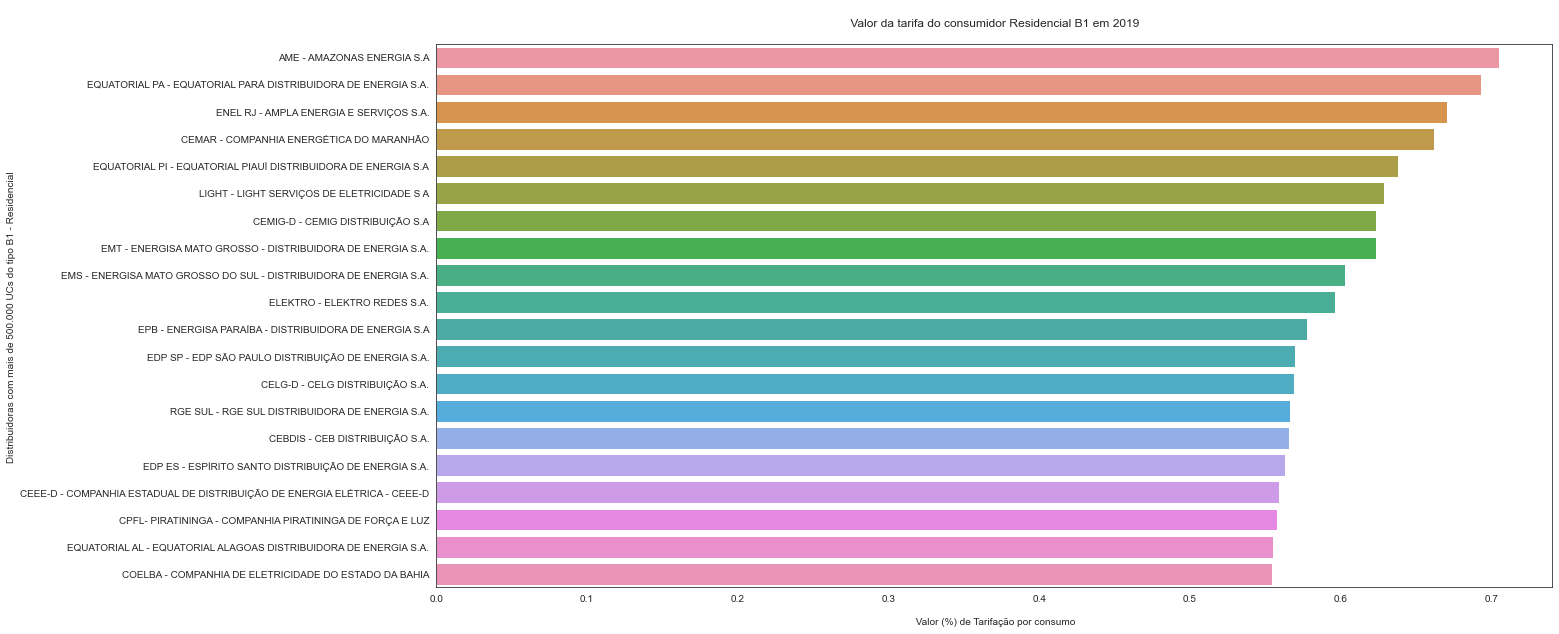

In [58]:
# Plot

# Figura
plt.figure(figsize = (20,10))

# Barplot
sns.barplot(y = a1_dist[:20].index, x = a1_dist[:20].Tarifa, orient = "h")



plt.ylabel('Distribuidoras com mais de 500.000 UCs do tipo B1 - Residencial ')             
plt.xlabel('\n Valor (%) de Tarifação por consumo')
plt.title('\n Valor da tarifa do consumidor Residencial B1 em 2019 \n')
plt.show()

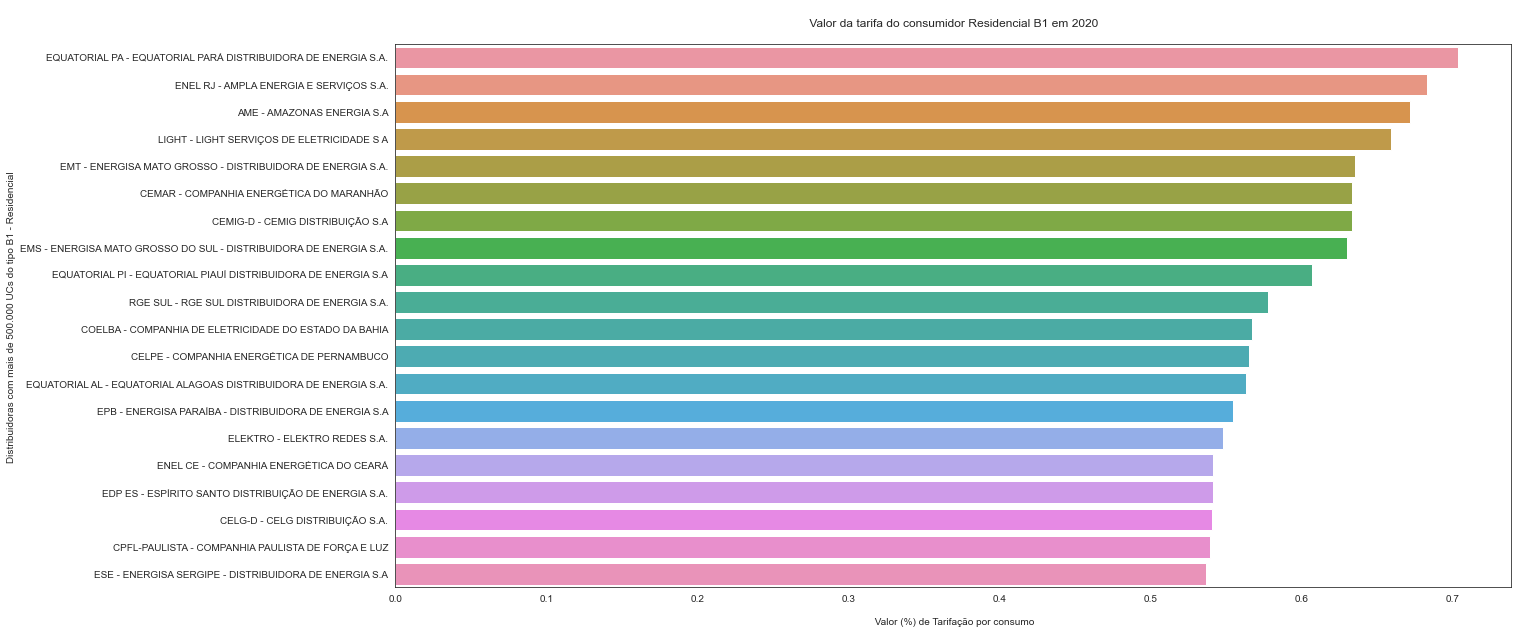

In [59]:
# Plot

# Figura
plt.figure(figsize = (20,10))

# Barplot
sns.barplot(y = a2_dist[:20].index, x = a2_dist[:20].Tarifa, orient = "h")



plt.ylabel('Distribuidoras com mais de 500.000 UCs do tipo B1 - Residencial ')             
plt.xlabel('\n Valor (%) de Tarifação por consumo')
plt.title('\n Valor da tarifa do consumidor Residencial B1 em 2020 \n')
plt.show()

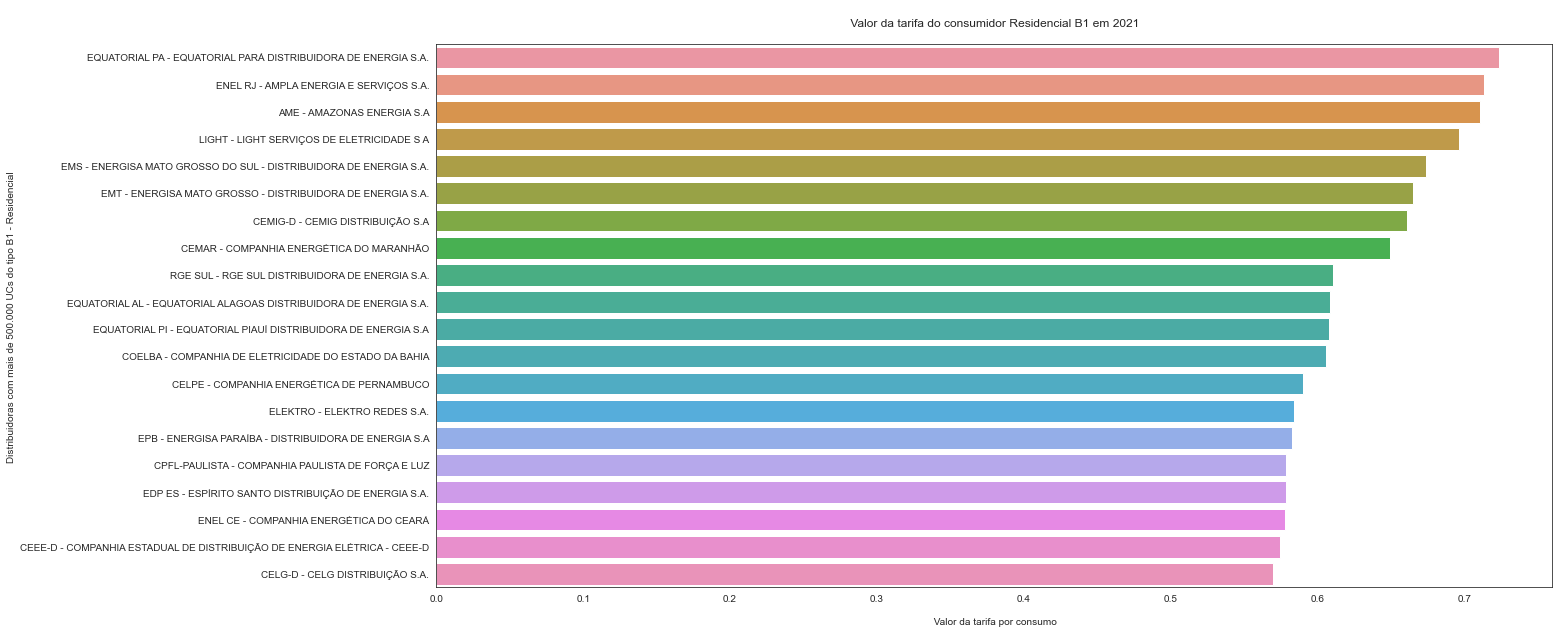

In [60]:
# Plot

# Figura
plt.figure(figsize = (20,10))

# Barplot
sns.barplot(y = a3_dist[:20].index, x = a3_dist[:20].Tarifa, orient = "h")



plt.ylabel('Distribuidoras com mais de 500.000 UCs do tipo B1 - Residencial ')             
plt.xlabel('\n Valor da tarifa por consumo')
plt.title('\n Valor da tarifa do consumidor Residencial B1 em 2021 \n')
plt.show()

In [61]:
samp2

,Ano,Mes,DescClasseConsumo,NomeAgente,FaixaTensao,ConsumoEnergiaEletricaMWh,ReceitaFornecimentoEE,NumeroUnidadesConsumidoras,ReceitaFornecimentoEEImp,TarifaMediaFornecimento,TarifaMediaFornecimentoImp
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",41533.57,13046417.92,771.0,17218463.85,314.1174,414.5674
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,24082.58,8100549.72,36966.0,10795170.15,336.3655,448.2564
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,"A4 (2,3 a 25 kV)",384.92,120813.23,11.0,120813.23,313.8658,313.8658
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3 - Demais Classes,708.64,238237.89,20.0,238237.89,336.1903,336.1903
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4b - Iluminação Pública - Bulbo de Lâmpada,6599.24,1143115.49,95.0,1524153.59,173.2193,230.9590
...,...,...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1- Baixa Renda - Consumo mensal superior a 30...,65.52,20245.96,191.0,32250.07,309.0043,492.2172
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,"A4 (2,3 a 25 kV)",14.47,9096.06,2.0,9728.29,628.6151,672.3075
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,1597.15,788927.11,4582.0,931938.05,493.9593,583.5006
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2 - Rural,0.73,350.23,6.0,430.46,479.7671,589.6712


# PARTE 2 DO PROJETO

In [62]:
#TRABALHANDO COM O MESMO ARQUVIO


In [63]:
samp2.Ano.min()

2003

In [64]:
def plot_corr(df, size=10):
    corr = samp2.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

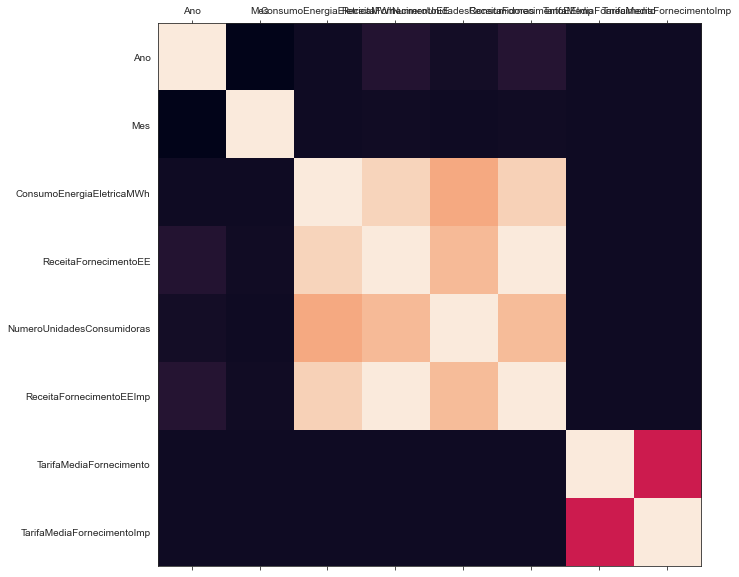

In [65]:
plot_corr(samp2)

In [66]:
samp2.corr()

,Ano,Mes,ConsumoEnergiaEletricaMWh,ReceitaFornecimentoEE,NumeroUnidadesConsumidoras,ReceitaFornecimentoEEImp,TarifaMediaFornecimento,TarifaMediaFornecimentoImp
Ano,1.000000,-0.043642,-0.000009,0.057899,0.011983,0.059291,0.001132,0.000038
Mes,-0.043642,1.000000,-0.000385,0.001424,0.000242,0.001225,0.000997,0.000520
ConsumoEnergiaEletricaMWh,-0.000009,-0.000385,1.000000,0.938495,0.823131,0.930106,-0.002208,-0.001073
ReceitaFornecimentoEE,0.057899,0.001424,0.938495,1.000000,0.867583,0.997641,-0.001015,-0.000458
NumeroUnidadesConsumidoras,0.011983,0.000242,0.823131,0.867583,1.000000,0.870751,-0.000870,-0.000344
ReceitaFornecimentoEEImp,0.059291,0.001225,0.930106,0.997641,0.870751,1.000000,-0.000958,-0.000607
TarifaMediaFornecimento,0.001132,0.000997,-0.002208,-0.001015,-0.000870,-0.000958,1.000000,0.485502
TarifaMediaFornecimentoImp,0.000038,0.000520,-0.001073,-0.000458,-0.000344,-0.000607,0.485502,1.000000


In [67]:
samp2 = samp2.drop(columns = ["ReceitaFornecimentoEEImp","TarifaMediaFornecimentoImp"])

In [68]:
samp2.FaixaTensao = samp2.FaixaTensao.str.slice(stop = 2)

In [69]:
samp2

,Ano,Mes,DescClasseConsumo,NomeAgente,FaixaTensao,ConsumoEnergiaEletricaMWh,ReceitaFornecimentoEE,NumeroUnidadesConsumidoras,TarifaMediaFornecimento
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,A4,41533.57,13046417.92,771.0,314.1174
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3,24082.58,8100549.72,36966.0,336.3655
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,A4,384.92,120813.23,11.0,313.8658
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3,708.64,238237.89,20.0,336.1903
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4,6599.24,1143115.49,95.0,173.2193
...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1,65.52,20245.96,191.0,309.0043
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,A4,14.47,9096.06,2.0,628.6151
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2,1597.15,788927.11,4582.0,493.9593
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2,0.73,350.23,6.0,479.7671


In [70]:
samp2.columns = ["Ano", "Mes", "Classe","Distribuidora","FaixaTensao","ConsumoMWh","Receita","NumeroUCs","Tarifa"]

In [71]:
samp2

,Ano,Mes,Classe,Distribuidora,FaixaTensao,ConsumoMWh,Receita,NumeroUCs,Tarifa
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,A4,41533.57,13046417.92,771.0,314.1174
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3,24082.58,8100549.72,36966.0,336.3655
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,A4,384.92,120813.23,11.0,313.8658
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3,708.64,238237.89,20.0,336.1903
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4,6599.24,1143115.49,95.0,173.2193
...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1,65.52,20245.96,191.0,309.0043
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,A4,14.47,9096.06,2.0,628.6151
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2,1597.15,788927.11,4582.0,493.9593
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2,0.73,350.23,6.0,479.7671


In [72]:
samp2["Tarifa"] = samp2["Tarifa"]/1000 

In [73]:
samp2

,Ano,Mes,Classe,Distribuidora,FaixaTensao,ConsumoMWh,Receita,NumeroUCs,Tarifa
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,A4,41533.57,13046417.92,771.0,0.314117
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3,24082.58,8100549.72,36966.0,0.336365
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,A4,384.92,120813.23,11.0,0.313866
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3,708.64,238237.89,20.0,0.336190
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4,6599.24,1143115.49,95.0,0.173219
...,...,...,...,...,...,...,...,...,...
462128,2021,5,Residencial,UHENPAL - NOVA PALMA ENERGIA LTDA,B1,65.52,20245.96,191.0,0.309004
462129,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,A4,14.47,9096.06,2.0,0.628615
462130,2021,5,Rural,UHENPAL - NOVA PALMA ENERGIA LTDA,B2,1597.15,788927.11,4582.0,0.493959
462131,2021,5,Rural Irrigante,UHENPAL - NOVA PALMA ENERGIA LTDA,B2,0.73,350.23,6.0,0.479767


In [74]:
zeros = len(samp2.loc[samp2['Tarifa'] == 0])
print("Número de zeros:",(zeros / len(samp2['Tarifa']))*100, '%')

Número de zeros: 0.15212070983894246 %


## MACHINE LEARNING

In [75]:
import sklearn as sk
sk.__version__

'0.24.1'

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['Ano', 'Mes', 'ConsumoMWh', 'Receita', 'NumeroUCs']

In [78]:
# Variável a ser prevista
atrib_prev = ['Tarifa']

In [79]:
X = samp2[atributos].values
Y = samp2[atrib_prev].values

In [80]:
# Definindo a taxa de split
split_test_size = 0.30

In [81]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size)

In [82]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(samp2.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(samp2.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [83]:
samp2.isnull().values.any()

True

In [84]:
samp2.head(5)

,Ano,Mes,Classe,Distribuidora,FaixaTensao,ConsumoMWh,Receita,NumeroUCs,Tarifa
0,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,A4,41533.57,13046417.92,771.0,0.314117
1,2009,8,"Comercial, Serviços e Outras",AME - AMAZONAS ENERGIA S.A,B3,24082.58,8100549.72,36966.0,0.336365
2,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,A4,384.92,120813.23,11.0,0.313866
3,2009,8,Consumo Próprio,AME - AMAZONAS ENERGIA S.A,B3,708.64,238237.89,20.0,0.336190
4,2009,8,Iluminação Pública,AME - AMAZONAS ENERGIA S.A,B4,6599.24,1143115.49,95.0,0.173219


In [85]:
print("# Linhas no dataframe {0}".format(len(samp2)))
print("# Linhas missing Ano: {0}".format(len(samp2.loc[samp2['Ano'] == 0])))
print("# Linhas missing Mes: {0}".format(len(samp2.loc[samp2['Mes'] == 0])))
print("# Linhas missing Classe: {0}".format(len(samp2.loc[samp2['Classe'] == 0])))
print("# Linhas missing Distribuidora: {0}".format(len(samp2.loc[samp2['Distribuidora'] == 0])))
print("# Linhas missing FaixaTensao: {0}".format(len(samp2.loc[samp2['FaixaTensao'] == 0])))
print("# Linhas missing ConsumoMWh: {0}".format(len(samp2.loc[samp2['ConsumoMWh'] == 0])))
print("# Linhas missing Receita: {0}".format(len(samp2.loc[samp2['Receita'] == 0])))
print("# Linhas missing NumeroUCs: {0}".format(len(samp2.loc[samp2['NumeroUCs'] == 0])))
print("# Linhas missing Tarifa: {0}".format(len(samp2.loc[samp2['Tarifa'] == 0])))

# Linhas no dataframe 462133
# Linhas missing Ano: 0
# Linhas missing Mes: 0
# Linhas missing Classe: 0
# Linhas missing Distribuidora: 0
# Linhas missing FaixaTensao: 0
# Linhas missing ConsumoMWh: 15776
# Linhas missing Receita: 14959
# Linhas missing NumeroUCs: 16527
# Linhas missing Tarifa: 703


### Tratando Dados Missing - Impute¶

Substituindo os valores iguais a zero, pela média dos dados


In [86]:
from sklearn.impute import SimpleImputer

In [87]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0 , strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Construindo e treinando o modelo

In [175]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [176]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [177]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').